In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Basic Libraries 📚

import pandas as pd
import os
import sys
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Basic Modules & Useful Installations:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# Completed Caracterization 🔧 

def data_caracterization():
    columns = df.columns.tolist()
    (dfrows,dfcolumns) = df.shape
    df.reset_index()
    print(f'Caracterization:\n')
    print(f'Number of Rows: {dfrows}\n')
    print(f'Number of Columns: {dfcolumns}\n')
    print(f'Columns Names/Variables/Features: {columns}\n')
    df.info()
    print(f'\n Head:\n')
    return df.head(5)

In [4]:
# Sum & Return duplicates, NaN & two empty spaces 🔧 

def data_explore(df):  
    duplicate_rows = df.duplicated().sum()
    nan_values = df.isna().sum()
    empty_spaces = df.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {df.duplicated().sum()} duplicate rows. Also;")
    return exploration

In [5]:
# Function to create several crosstab with multindex in columns 🔧

def cross_tab_maker(target, df):
    crosstab_list = []  
    for column in df:
        crosstab = pd.crosstab(target, df[column])
        crosstab.columns = pd.MultiIndex.from_product([[column], crosstab.columns])
        crosstab_list.append(crosstab)
    crosstab_df = pd.concat(crosstab_list, axis=1)
    return crosstab_df

In [6]:
# Multi chi-quadrado and Cramer V tests 🛠️

def categorical_rel_chi_cram_tests(crosstab_df, flag_columns):
    for column in flag_columns:
        sub_df = pd.DataFrame(crosstab_df[column])
        _, p_value, _, _ = chi2_contingency(sub_df)
        cramer = association(sub_df, method='cramer')
        print(f'Chi-square (χ²) test for {column} is {p_value}')
        print(f'Cramers V test for {column} is {cramer}\n')

In [7]:
# Construct reading relative path
relative_path = "my-jobcation-path/02_data_cleaning_phase/00_First Clean & SQL/example_path.csv"


# Change directory
os.chdir('C:\\Users\\Oscar\\Documents\\00_Ironhack\\P3_Final\\') #Change for your own directory

# Check directory
current_directory = os.getcwd()
print("Current working directory is:", current_directory)

Current working directory is: C:\Users\Oscar\Documents\00_Ironhack\P3_Final


In [8]:
#Construct absolute paths
example_path = os.path.join(current_directory, relative_path)

In [9]:
# Coworkings reading
if os.path.exists(example_path):
    try:
        # Try to read the CSV file
        data = pd.read_csv(example_path)
        print("The file has been loaded successfully.")
        # Now you can work with the 'data' DataFrame
    except Exception as e:
        print("An error occurred while reading the file:", e)
else:
    print("The file does not exist at the specified path:", example_path)

The file has been loaded successfully.


In [10]:
# Dataframe Creation
df = data.copy()

In [11]:
data_caracterization()

Caracterization:

Number of Rows: 286

Number of Columns: 6

Columns Names/Variables/Features: ['location', 'site_type', 'comments', 'latitude', 'longitude', 'town']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   269 non-null    object 
 1   site_type  286 non-null    object 
 2   comments   280 non-null    object 
 3   latitude   286 non-null    float64
 4   longitude  286 non-null    float64
 5   town       282 non-null    object 
dtypes: float64(2), object(4)
memory usage: 13.5+ KB

 Head:



,location,site_type,comments,latitude,longitude,town
0,Village/Town/City,Mixed Parking,Free car park at ijzerdijk tower. Quiet except...,51.030514,2.853777,Diksmuide
1,Village/Town/City,Rest Area & Services,Small free aire for 6 Motorhomes. Located to ...,43.445732,3.677563,Baleruc les Bains
2,Village/Town/City,Mixed Parking,Flat level car park. The car park is metered ...,43.613193,3.887071,Montpellier
3,Village/Town/City,Mixed Parking,"Flat, leave and quiet along tree lined street....",43.644123,3.962388,Saint Aunės
4,Village/Town/City,Mixed Parking,Nimes city centre is paid parking but this lit...,43.826320,4.357532,Nimes


In [12]:
comments = df["comments"].tolist()
text = ''.join(map(str, comments))

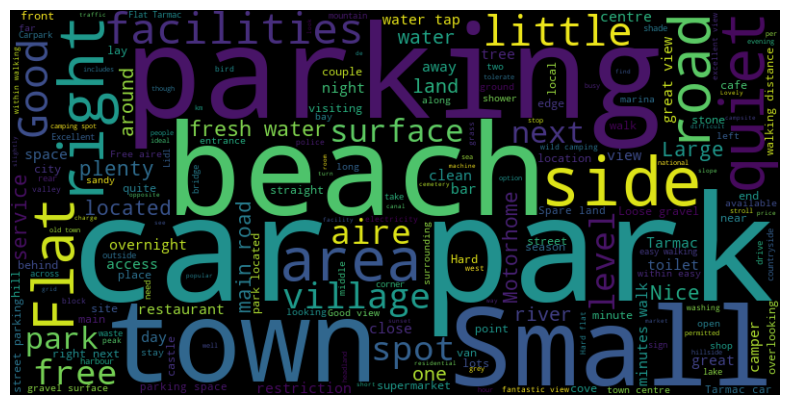

In [13]:
#Create wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

#Show the Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

More relevant words beach, town, parking, village, spot, facilities.

In [15]:
df["location"].unique()

array(['Village/Town/City', 'Countryside', 'Beach', nan, 'Harbour',
       'Lake'], dtype=object)

In [16]:
df["location"].value_counts()

location
Village/Town/City    130
Beach                 78
Countryside           39
Harbour               15
Lake                   7
Name: count, dtype: int64

In [17]:
df["site_type"].unique()

array(['Mixed Parking', 'Rest Area & Services', 'Wild', 'Campsite',
       'Service Only', 'Layby'], dtype=object)

In [18]:
df["site_type"].value_counts()

site_type
Mixed Parking           178
Wild                     67
Rest Area & Services     31
Service Only              5
Layby                     3
Campsite                  2
Name: count, dtype: int64

Mixed Parking, are the major part logically, Wild and Rest Area the next

## RATING IMPORTANCE CROSSING BY CITY RETRIEVED:

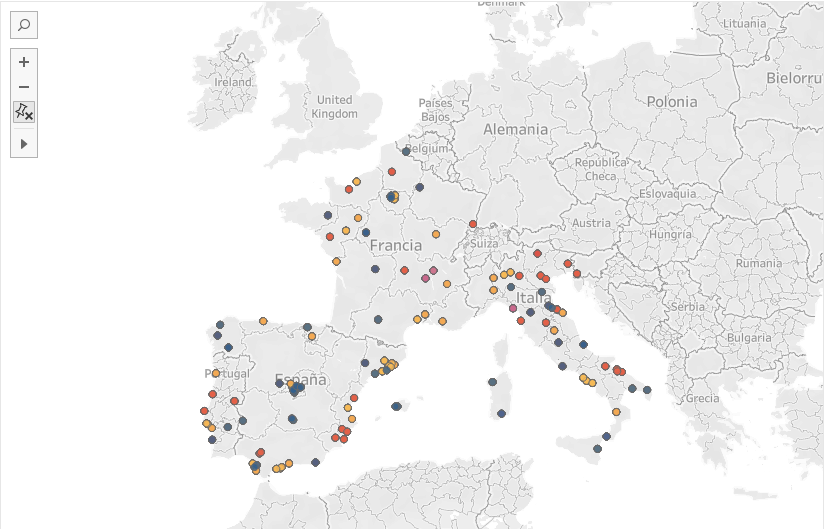

I consider that the best rated campsites are usually divided into 3 categories:
- Northern Italy, Mediterranean Coast, Portuguese Coast and Loire Countries.
- Second good zones are the Occitan and French Riviera, Southern Italy, Andalusia.
- Remaining areas

Image retrieved from Tableou